### 【問題1】仮定関数
ロジスティック回帰の仮定関数のメソッドをScratchLogisticRegressionクラスに実装してください。<br>
ロジスティック回帰の仮定関数は、線形回帰の仮定関数を シグモイド関数 に通したものです。シグモイド関数は以下の式で表されます。<br>
<br>
　　　　$ g(z) = \displaystyle\frac{1}{1+e^{-z}} $<br>
<br>
線形回帰の仮定関数は次の式でした。<br>
<br>
　　　　$ h_{\theta}(x) = \theta^T・x$<br>
<br>
まとめて書くと、ロジスティック回帰の仮定関数は次のようになります。<br>
<br>
　　　　$ h_{\theta}(x) = \displaystyle\frac{1}{1+e^{-\theta^T・x}} $<br>
<br>
　　　　$ x $ : 特徴量ベクトル<br>
　　　　$ \theta $ : パラメータ（重み）ベクトル<br>


In [1]:

# 問題７参照


### 【問題2】最急降下法
最急降下法により学習させる実装を行なってください。以下の式で表されるパラメータの更新式のメソッド_gradient_descentを追加し、fitメソッドから呼び出すようにしてください。<br>
<br>
　　　　$ \theta_j := \theta_j - \alpha\displaystyle\frac{\partial J(\theta)}{\partial\theta_j} $<br>
<br>
　　　　$ \displaystyle\frac{\partial J(\theta)}{\partial\theta_0} = \displaystyle\frac{1}{m}\displaystyle\sum_{i=1}^{m}(h_{\theta}(x^{(i)}) - y^{(i)})x_j^{(i)} ,　j = 0 $<br>
<br>
　　　　$ \displaystyle\frac{\partial J(\theta)}{\partial\theta_j} = (\displaystyle\frac{1}{m}\displaystyle\sum_{i=1}^{m}(h_{\theta}(x^{(i)}) - y^{(i)})x_j^{(i)}) + \displaystyle\frac{\lambda}{m}\theta_j ,　j \geqq 0 $<br>
<br>
　　　　$ \alpha $ : 学習率<br>
　　　　$ i $ : サンプルのインデックス<br>
　　　　$ j $ : 特徴量のインデックス<br>
　　　　$ m $ : 入力されるデータの数<br>
　　　　$ h_{\theta}() $ : 仮定関数<br>
　　　　$ x $ : 特徴量ベクトル<br>
　　　　$ \theta $ : パラメータ（重み）ベクトル<br>
　　　　$ x^{(i)} $ : i番目のサンプルの特徴量ベクトル<br>
　　　　$ y^{(i)} $ : i番目のサンプルの正解ラベル<br>
　　　　$ \theta_j $ : j番目のパラメータ（重み）<br>
　　　　$ \lambda $ : 正則化パラメータ<br>
<br>
以上の式には正則化項が含まれます。正則化項は過学習を防ぐ目的で用いられます。<br>
切片である$ \theta_0 $が正則化項に含まれていないのは、切片を除いた特徴量に対する係数を同じ視点で議論することができるようにするためです。

In [2]:

# 問題７参照


### 【問題4】目的関数
以下の数式で表されるロジスティック回帰の 目的関数（損失関数） を実装してください。そして、これをself.loss, self.val_lossに記録するようにしてください。<br>
なお、この数式には正則化項が含まれています<br>
<br>
　　　　$ J(\theta) = \displaystyle\frac{1}{m}\displaystyle\sum_{i=1}^{m}[-y^{(i)}\log(h_{\theta}(x^{(i)})) - (1 - y^{(i)}\log(1 - h_{\theta}(x^{(i)}))] +  $<br>
<br>
　　　　$ m $ : 入力されるデータの数<br>
　　　　$ h_{\theta}() $ : 仮定関数<br>
　　　　$ x $ : 特徴量ベクトル<br>
　　　　$ \theta $ : パラメータ（重み）ベクトル<br>
　　　　$ x^{(i)} $ : i番目のサンプルの特徴量ベクトル<br>
　　　　$ y^{(i)} $ : i番目のサンプルの正解ラベル<br>
　　　　$ \theta_j $ : j番目のパラメータ（重み）<br>
　　　　$ n $ : 特徴量の数<br>
　　　　$ \lambda $ : 正則化パラメータ<br>
<br>


In [3]:

# 問題７参照


### 【問題5】学習と推定
機械学習スクラッチ入門のSprintで用意したirisデータセットのvirgicolorとvirginicaの2値分類に対してスクラッチ実装の学習と推定を行なってください。<br>
scikit-learnによる実装と比べ、正しく動いているかを確認してください。<br>
AccuracyやPrecision、Recallなどの指標値はscikit-learnを使用してください。<br>


<ipython-input-29-d897c56909a4>:117: RuntimeWarning: divide by zero encountered in log
  loss_array = (np.sum((-1 * y * np.log(hypothesis_y)) - ((1 - y) * np.log(1 - hypothesis_y))) / X.shape[0]) \
<ipython-input-29-d897c56909a4>:117: RuntimeWarning: invalid value encountered in multiply
  loss_array = (np.sum((-1 * y * np.log(hypothesis_y)) - ((1 - y) * np.log(1 - hypothesis_y))) / X.shape[0]) \


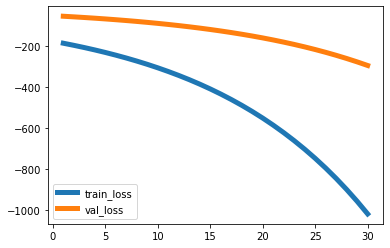

[[1. 1.]
 [1. 1.]
 [1. 1.]
 ...
 [1. 1.]
 [1. 1.]
 [1. 1.]]


ValueError: cannot reshape array of size 295200 into shape (410,360)

In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from sklearn.metrics import precision_recall_curve
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from matplotlib.colors import ListedColormap


class ScratchLogisticRegression():
    """
    ロジスティック回帰のスクラッチ実装
    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    no_bias : bool
      バイアス項を入れない場合はTrue
    verbose : bool
      学習過程を出力する場合はTrue
    Attributes
    ----------
    self.coef_ : 次の形のndarray, shape (n_features,)
      パラメータ
    self.loss : 次の形のndarray, shape (self.iter,)
      訓練データに対する損失の記録
    self.val_loss : 次の形のndarray, shape (self.iter,)
      検証データに対する損失の記録
    """
    def __init__(self, num_iter, lr, penalty, bias, verbose):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.bias = bias
        self.verbose = verbose
        # 損失を記録する配列を用意
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)

        # 正則化パラメータ(lambda) ここでは値とする
        self.penalty = penalty

    def fit(self, X, y, X_val=None, y_val=None):
        """
        ロジスティック回帰を学習する。検証データが入力された場合はそれに対する損失と精度もイテレーションごとに計算する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証データの正解値
        """
#         if self.verbose:
#             #verboseをTrueにした際は学習過程を出力
#             print()

        # Xの1列目に「1」を入れる
        zeroplus_X = np.insert(X, 0, 1, axis = 1)

        if X_val is not None:
            # X_valの1列目に「1」を入れる
            val_zeroplus_X = np.insert(X_val, 0, 1, axis = 1)

        # ランダムな値をself.thetaの初期値に設定する
        self.theta = np.random.random(len(zeroplus_X[0]))

        for i in range(self.iter):
#             print("{}回目ループ / 全{}回 ".format(i, self.iter))

            # 仮定関数
            hypothesis_y = self._logistic_hypothesis(zeroplus_X)

            # errorの計算
            error = hypothesis_y - y

            # self.thetaの更新
            self._gradient_descent(zeroplus_X, error)

            # 損失関数の計算
            self.loss[i] = self._loss_func(zeroplus_X, y, hypothesis_y)

            if X_val is not None:
                val_hypothesis_y = self._logistic_hypothesis(val_zeroplus_X)
                val_error = val_hypothesis_y - y
                self.val_loss[i] = self._loss_func(val_zeroplus_X, y_val, val_hypothesis_y)


    def _logistic_hypothesis(self, X):

        # 仮定のy
        hypothesis_y = 1 / (1 + np.e ** (-1 * np.dot(self.theta.T,X.T)))

        return hypothesis_y


    def _gradient_descent(self, X, error):

        # 切片の場合
        self.theta[0] = self.theta[0] - self.lr * (np.sum(error@X[:,0])) / X.shape[0]
        # 切片以外の場合
        self.theta[1:] = self.theta[1:] - self.lr * ((np.sum(error@X[:,1:])) / X.shape[0]) + (self.penalty * self.theta[1:] / X.shape[0])


    def _loss_func(self, X, y, hypothesis_y):
#         print("np.log(hypothesis_y):{}".format(np.log(hypothesis_y)))
#         print("np.log(1 - hypothesis_y)):{}".format(np.log(1 - hypothesis_y)))
        loss_array = (np.sum((-1 * y * np.log(hypothesis_y)) - ((1 - y) * np.log(1 - hypothesis_y))) / X.shape[0]) \
                     + (self.penalty * np.sum(self.theta ** 2) / (2 * X.shape[0]))

        return loss_array


    def _calc_error(self, X, y):

        hypothesis_y = self._logistic_hypothesis(X)
        error = hypothesis_y - y

        return error


    def predict(self, X):
        """
        ロジスティック回帰を使いラベルを推定する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル
        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            ロジスティック回帰による推定結果
        """

        # Xの1列目に「1」を入れる
        zeroplus_X = np.insert(X, 0, 1, axis = 1)

        # predict_probaにて、仮定関数の値を算出
        predict_proba_y = self.predict_proba(zeroplus_X)

        # 算出した値に対して閾値を設定し、「0」と「1」にラベル分けする
        # 閾値を盲目的に 0.5 にしてもよいのか？それともprecision_recall_curve(多分閾値を出す関数）を使うのか
        classification = []
        for i in range(len(predict_proba_y)):
            if predict_proba_y[i] >= 0.5:
                classification.append(1)
            else:
                classification.append(0)
#         for i in range(len(predict_proba_y[0])):
#             for j in range(len(predict_proba_y[1])):
#                 if predict_proba_y[i,j] >= 0.5:
#                     classification.append(1)
#                 else:
#                     classification.append(0)
#         nd_classification = np.array(classification).reshape(len(predict_proba_y),1)
#         predict_y = np.concatenate([predict_proba_y, nd_classification], 1)
        nd_classification = np.array(classification).reshape(len(predict_proba_y),1)
        predict_proba_y = predict_proba_y.reshape(len(predict_proba_y),1)
        predict_y = np.concatenate([predict_proba_y, nd_classification], 1)
        print(predict_y)

        return predict_y


    def predict_proba(self, zeroplus_X):
        """
        ロジスティック回帰を使い確率を推定する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル
        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            ロジスティック回帰による推定結果
        """

        predict_proba_y = 1 / (1 + np.e ** (-1 * np.dot(self.theta.T,zeroplus_X.T)))

        return predict_proba_y



def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は訓練データまたは検証データである。

    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        特徴量
    y : ndarray, shape(n_samples,)
        ラベル
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)

    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()



# irisのデータセットを読み込む
data = load_iris()
# 読み込んだデータセットをdataframeへ置き換える
p_data_x = pd.DataFrame(data.data)
p_data_y = pd.DataFrame(data.target)
# dataframeを結合し、カラム名を設定する
df_default = pd.concat([p_data_x, p_data_y],axis=1)
df_default = df_default.set_axis(["sepal_length","sepal_width","petal_length","petal_width","Species"], axis="columns")
# 今回使用しないカラムと行を削除
df_d_index = df_default.index[p_data_y[0] == 0]
df = df_default.drop(df_d_index)
# indexを振りなおす
df = df.reset_index(drop="True")
X_iris = df.drop(["sepal_width","petal_width","Species"], axis=1).values
y_iris = df.drop(["sepal_length","sepal_width","petal_length","petal_width"], axis=1).values

# train_test_splitにX、yを代入（デフォルト(指定なし)で訓練75%、検証25%となる）
X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris, random_state=42)

# スクラッチしたクラスをインスタンス化し、ロジスティック回帰による分析を行う
slr = ScratchLogisticRegression(num_iter=100, lr=0.0000000001, penalty=5, bias=False, verbose=False)
slr.fit(X_train, y_train, X_test, y_test)

# rec = slr.predict(X_test, y_test)

# 学習率をグラフ化
plt.plot(np.arange(1,len(slr.loss)+1),slr.loss,label='train_loss',linewidth=5)
plt.plot(np.arange(1,len(slr.val_loss)+1),slr.val_loss,label='val_loss',linewidth=5)
plt.legend()
plt.show()

# # 可視化
decision_region(X_test, y_test, slr)


In [ ]:
import numpy as np


X = np.array([1,2,3]).reshape(1,3)
print(X[:,1:])
print(np.e)


In [ ]:
a = 12345678 \
    + 11111111
print(a)